In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display


In [6]:
%matplotlib inline
sns.set()

In [2]:
transactions = 'data/transaction_data.csv'
households = 'data/hh_demographic.csv'
hh_behaviour = 'hh_behaviour_features.csv'

In [46]:
df_trans = pd.read_csv(transactions)
df_hh = pd.read_csv(households)
df_behav = pd.read_csv(hh_behaviour)

In [64]:
df_hh

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,new_income_range
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,35-49K
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,50-74K
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,25-34K
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,75-99K
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,50-74K
5,65+,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,17,0-14K
6,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,18,100-149K
7,35-44,B,15-24K,Unknown,Single Female,1,None/Unknown,19,15-24K
8,25-34,A,75-99K,Renter,2 Adults No Kids,2,None/Unknown,20,75-99K
9,45-54,A,75-99K,Homeowner,2 Adults No Kids,2,None/Unknown,22,75-99K


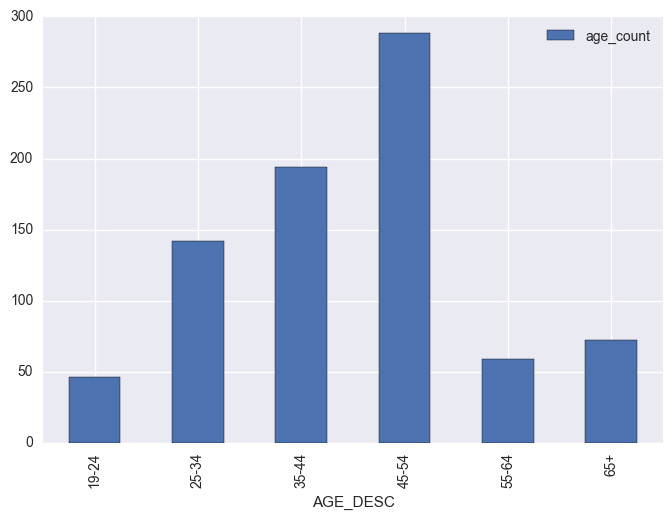

In [66]:
age_dist = df_hh[['AGE_DESC', 'household_key']]
age_dist = age_dist.groupby('AGE_DESC').count()
age_dist = age_dist.rename(columns={'household_key':'age_count'})
age_dist.plot(kind='bar')

In [76]:
age_dist

,age_count
AGE_DESC,
19-24,46
25-34,142
35-44,194
45-54,288
55-64,59
65+,72


In [68]:
df_hh['new_marriage_code'] = df_hh.MARITAL_STATUS_CODE.map({
    'A': 'Married',
    'B': 'Single',
    'U': 'Unknown'
})

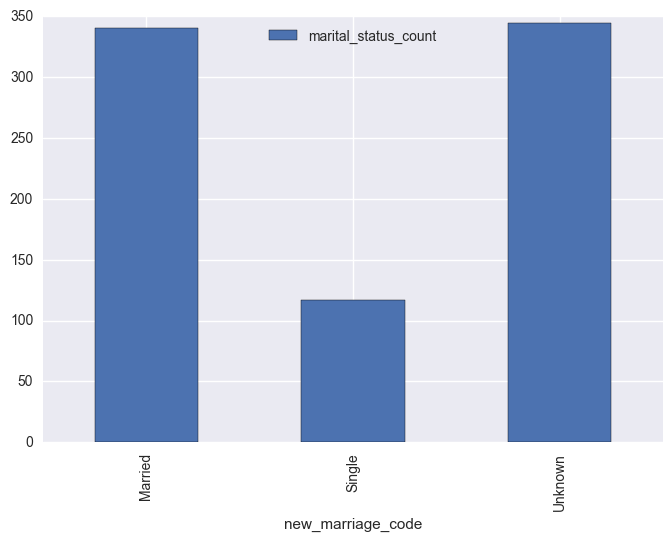

In [69]:
marriage_dist = df_hh[['new_marriage_code', 'household_key']]
marriage_dist = marriage_dist.groupby('new_marriage_code').count()
marriage_dist = marriage_dist.rename(columns={'household_key':'marital_status_count'})
marriage_dist.plot(kind='bar')

In [77]:
marriage_dist

,marital_status_count
new_marriage_code,
Married,340
Single,117
Unknown,344


In [63]:
df_hh['new_income_range'] = df_hh.INCOME_DESC.map({
    'Under 15K': '0-14K',
    '15-24K': '15-24K',
    '25-34K': '25-34K',
    '35-49K': '35-49K',
    '50-74K': '50-74K',
    '75-99K': '75-99K',
    '100-124K': '100-149K',
    '125-149K': '100-149K',
    '150-174K': '150K+',
    '175-199K': '150K+',
    '200-249K': '150K+',
    '250K+': '150K+'
})

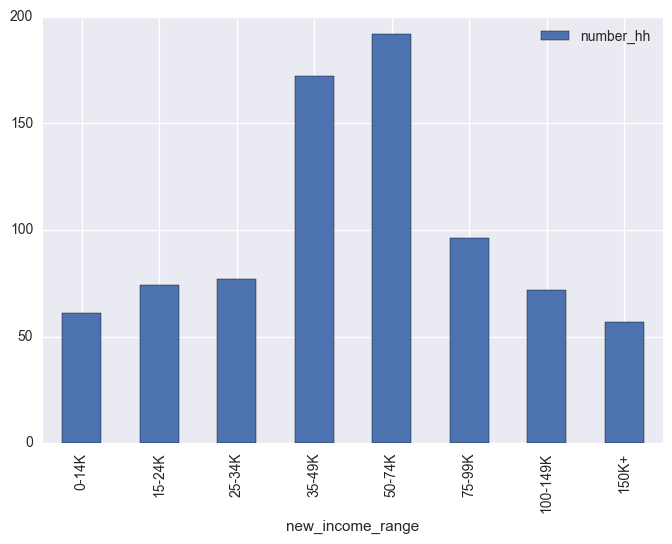

In [62]:
income_dist = df_hh[['new_income_range', 'household_key']]
income_dist = income_dist.groupby('new_income_range').count()
income_dist = income_dist.rename(columns={'household_key':'number_hh'})
income_dist = income_dist.reindex(['0-14K','15-24K','25-34K','35-49K','50-74K','75-99K','100-149K','150K+'])
income_dist.plot(kind='bar')

In [78]:
income_dist

,number_hh
new_income_range,
0-14K,61
15-24K,74
25-34K,77
35-49K,172
50-74K,192
75-99K,96
100-149K,72
150K+,57


In [71]:
df_hh['new_homeowner_code'] = df_hh.HOMEOWNER_DESC.map({
    'Probable Renter': 'Renter',
    'Renter': 'Renter',
    'Probable Owner': 'Homeowner',
    'Homeowner': 'Homeowner',
    'Unknown': 'Unknown'
})

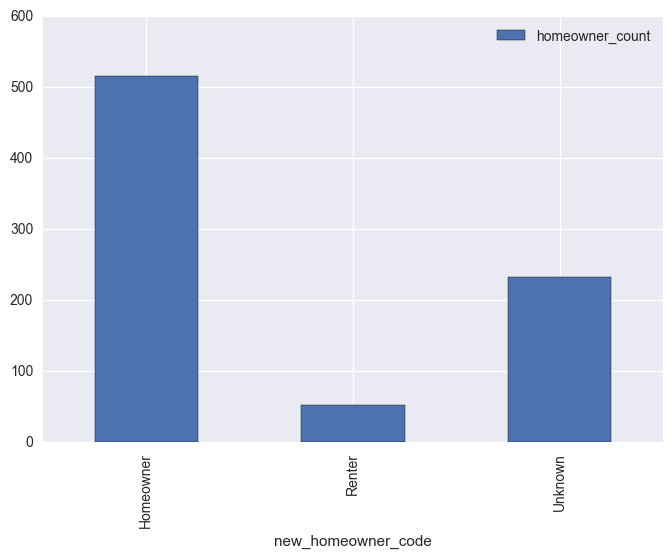

In [74]:
homeowner_dist = df_hh[['new_homeowner_code', 'household_key']]
homeowner_dist = homeowner_dist.groupby('new_homeowner_code').count()
homeowner_dist = homeowner_dist.rename(columns={'household_key':'homeowner_count'})
homeowner_dist.plot(kind='bar')

In [79]:
homeowner_dist

,homeowner_count
new_homeowner_code,
Homeowner,515
Renter,53
Unknown,233


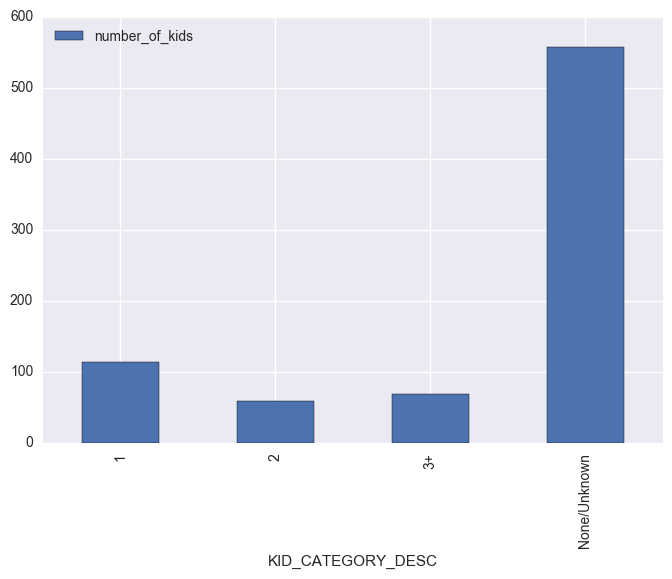

In [80]:
children_dist = df_hh[['KID_CATEGORY_DESC', 'household_key']]
children_dist = children_dist.groupby('KID_CATEGORY_DESC').count()
children_dist = children_dist.rename(columns={'household_key':'number_of_kids'})
children_dist.plot(kind='bar')

In [81]:
children_dist

,number_of_kids
KID_CATEGORY_DESC,
1,114
2,60
3+,69
None/Unknown,558


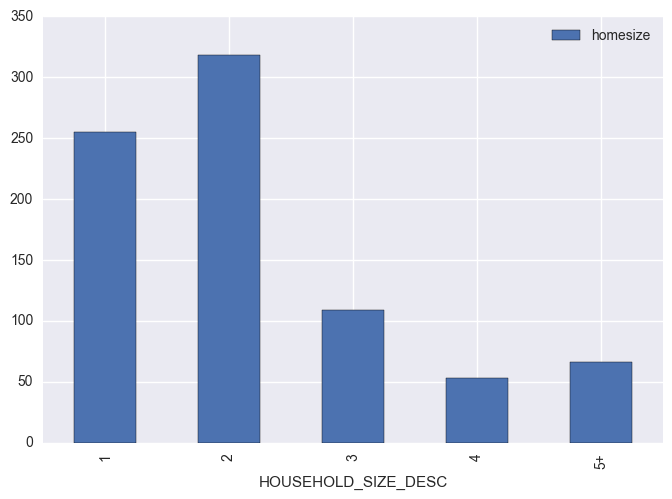

In [82]:
homesize_dist = df_hh[['HOUSEHOLD_SIZE_DESC', 'household_key']]
homesize_dist = homesize_dist.groupby('HOUSEHOLD_SIZE_DESC').count()
homesize_dist = homesize_dist.rename(columns={'household_key':'homesize'})
homesize_dist.plot(kind='bar')

In [83]:
homesize_dist

,homesize
HOUSEHOLD_SIZE_DESC,
1,255
2,318
3,109
4,53
5+,66
